<ol><h1><li>Exploratory Data Analysis</li></h1>
<ol><h2><li>Data Set Information</li></h2>
<ol><h4><li>Title: Haberman's Survival Data</li></h4>
<h4><li>Attribute Information:</li></h4>
<ul><li>Age of patient at time of operation (numerical).</li>
<li>Patient's year of operation (year - 1900, numerical).</li>
<li>Number of positive axillary nodes detected (numerical).</li>
<li>Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year.</li>
    </ul>
<h4><li>NUMBER OF DATA-POINTS: 305</li></h4>
<h4><li>NUMBER OF ATTRIBUTES: 4 (including the class attribute)</li></h4>
<h4><li>CLASS ATTRIBUTE: 2(1 = the patient survived 5 years or longer 2 = the patient died within 5 year).</li></h4>
<h4><li>MISSING ATTRIBUTE VALUES: None.</li></h4></ol>

<h2><li>Objective</li></h2><br>
To predict whether a patient will live for greater than equal to 5 years or not.</ol></ol>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels import robust

## Loading and Reading dataset

In [3]:
df = pd.read_csv('haberman.csv')
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [4]:
#Reading column names
df.columns

Index(['30', '64', '1', '1.1'], dtype='object')

In [5]:
#changing the column names of dataset
#'30'='age'= age of patient at time of operation
#'64' = 'year' = Patients year of operation
#'1'='pos_aux_nodes'= number of positive auxillary nodes detected
#'1.1' = 'survival_status'= Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year
df.columns = ['age','year','pos_aux_nodes','survival_status']
df.head()

,age,year,pos_aux_nodes,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [6]:
df['survival_status'][df['survival_status']==1]='>=5'
df['survival_status'][df['survival_status']==2]='<5'
df.head()

,age,year,pos_aux_nodes,survival_status
0,30,62,3,>=5
1,30,65,0,>=5
2,31,59,2,>=5
3,31,65,4,>=5
4,33,58,10,>=5


In [7]:
df.describe()

,age,year,pos_aux_nodes
count,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066
std,10.744024,3.254078,7.199370
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,61.000000,66.000000,4.000000
max,83.000000,69.000000,52.000000


In [8]:
#no. of data-points and features
print(df.shape)

(305, 4)


In [9]:
#no. of data-points for each class
df['survival_status'].value_counts()


>=5    224
<5      81
Name: survival_status, dtype: int64

##### Haberman dataset is imbalanced dataset as the number of data-points for class '>=5' is greater than for class'<5'

## Plotting the pair-plot

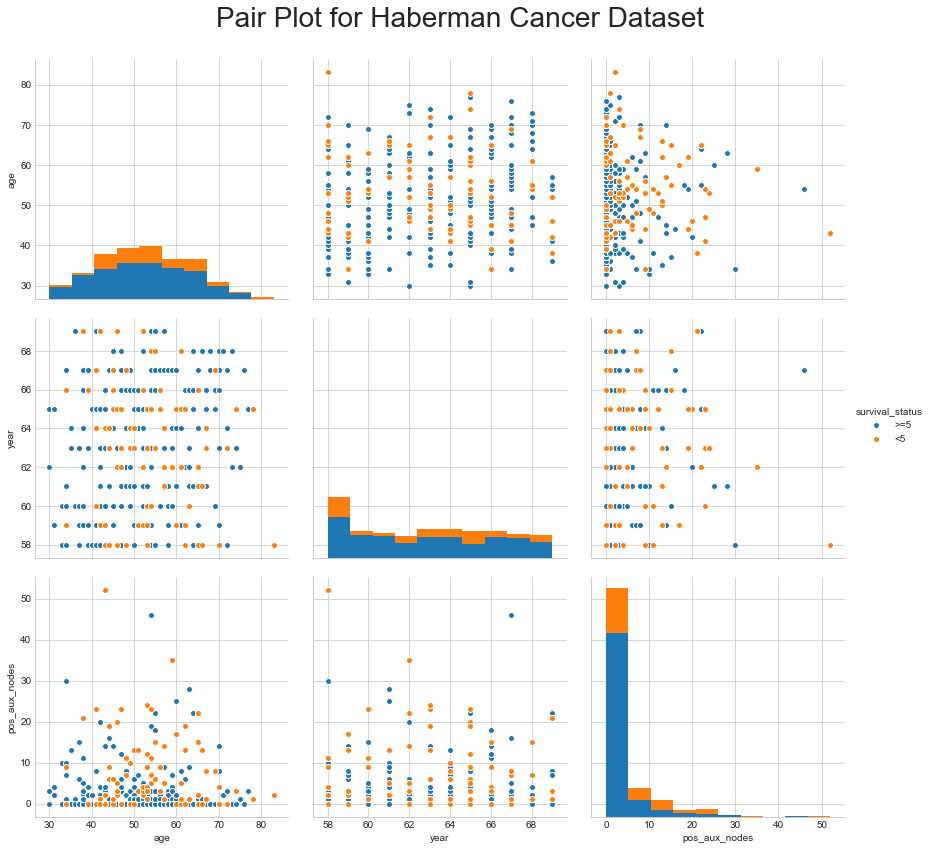

In [10]:
#pair-plot
sns.set_style('whitegrid')
sns.pairplot(df,hue = 'survival_status',size = 4);
#Title
plt.subplots_adjust(top=0.92)
plt.suptitle('Pair Plot for Haberman Cancer Dataset',size = 28);
plt.show()

## Observation
#### As we can see from above pairplot that none of the 2D scatter plots in it are of any use as the none of the combination of any two features out of available 4 features in our dataset are able to separate  the two classes (>=5 and <5) in our dataset.

## Plotting Probability Distribution Functions for each of the features in dataset.

C:\Users\Nihar\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Nihar\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


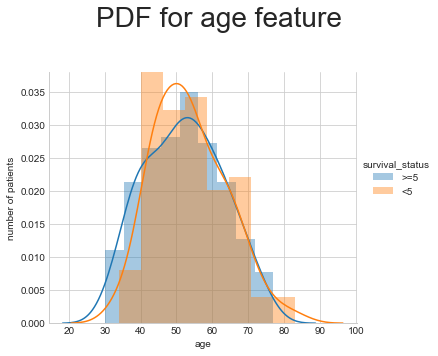

In [11]:
#plotting pdf for age feature
sns.FacetGrid(df,hue = 'survival_status',size = 5).map(sns.distplot,'age').add_legend()
#Title
plt.subplots_adjust(top=0.8, wspace = 0.6)
plt.suptitle('PDF for age feature',size = 28)
plt.ylabel('number of patients')
plt.show()

## Observation
#### The above pdf's are overlapping each other  and thus dont provide us with enough information with which we can build a simple if-else model and predict the survival status of the patient.

C:\Users\Nihar\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Nihar\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


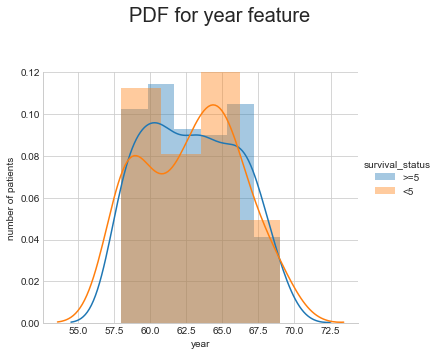

In [12]:
#plotting pdf for year feature
sns.FacetGrid(df,hue = 'survival_status',size = 5).map(sns.distplot,'year').add_legend()
plt.subplots_adjust(top=0.8)
plt.suptitle('PDF for year feature',size = 20)
plt.ylabel('number of patients')
plt.show()

## Observation
#### 1. The above distribution is also not very useful as the two distributions are almost overlapping and thus dont provide us with enough information with which we can build a simple if-else model and predict the survival status of the patient.
#### 2. The only thing that we can take out of above distribution is that, the survival status of people who had cancer operation    between 1958 to 1962 (approx.) is better than people who had cancer operation between 1962 to 1966 (approx.) because from above distribution we can see that people who had operation during the time period 1958 to 1962 there chance of living greater than 5 years is more than there chance of living less than 5 years where as people who had operation during time period 1962 to 1966 there chance of living less than 5 years is more as compared to there chance of living more than or equal to 5 years.

C:\Users\Nihar\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Nihar\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


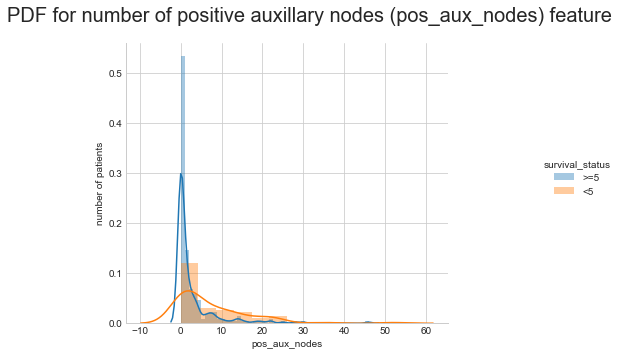

In [13]:
#plotting pdf for age feature
sns.FacetGrid(df,hue = 'survival_status',size = 5).map(sns.distplot,'pos_aux_nodes').add_legend()
plt.subplots_adjust(top=0.88)
plt.suptitle('PDF for number of positive auxillary nodes (pos_aux_nodes) feature',size = 20)
plt.ylabel('number of patients')
plt.show()

## Observation
#### 1. The point at which our two distributions intersect seems to be greater than 3 but less than 4. So let's take our threshold value of number of positive auxillary nodes =  3.5 = Threshold value (lets say). Now we will try to build a simple if-else model to see if we can separate the two survival statuses based on number of positive auxillary nodes.
#### 2. The usefulness of features is :
####                                                pos_aux_nodes >> age and year

## Creating a simple if-else model using most effective feature

In [14]:
#simple if-else model to separate the survival statuses based on number of positive auxillary nodes
lst = []
def model_1(pan):
    if pan<=3:
        return '>=5'
    else:
        return '<5'
for i in range(len(df)):
    d = df.iloc[i]
    k = model_1(d['pos_aux_nodes'])
    lst.append(k)
survival_status = df['survival_status']
survival_status_1 = list(survival_status)
count = 0
for i in range(len(survival_status_1)):
    if lst[i]!=survival_status_1[i]:
        count+=1
print('Number of errors: ',count)
accuracy = ((len(survival_status)-count)/len(survival_status))*100
print('Accuracy: ',accuracy)

Number of errors:  86
Accuracy:  71.80327868852459


## Observation
#### 1. We can see that by creating a simple if-else model we are getting an accuracy of 71% in determining if a person will live for >=5 years or <5 years and the number of instances where our model fails is 86 times out of 305 available data-points. 
#### 2. Therefor number of positive auxillary nodes (pos_aux_nodes) feature is giving us maximum information.

## Plotting CDF's for each of the features

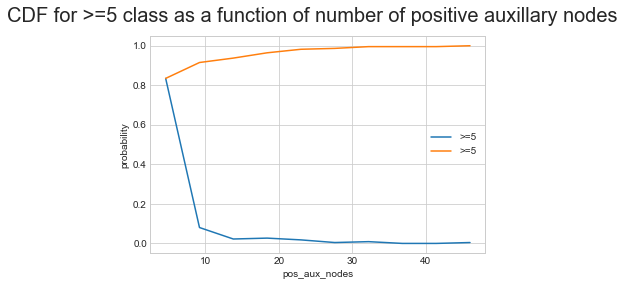

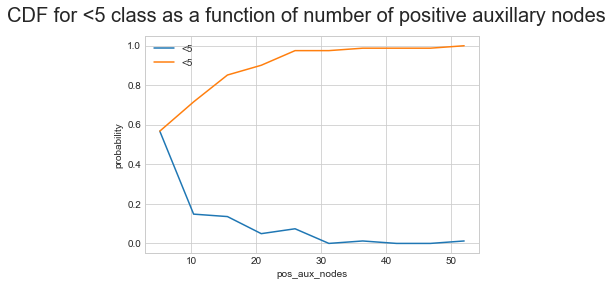

In [15]:
# plotting cdfs for all the available features
greater_5 = df.loc[df['survival_status']=='>=5']
less_5 = df.loc[df['survival_status']=='<5']
lst_1 = [greater_5,less_5]
title = ['CDF for >=5 class as a function of number of positive auxillary nodes','CDF for <5 class as a function of number of positive auxillary nodes']
count = 0
label_1 = ['>=5','<5']
def distribution(a):
    counts,bin_edges = np.histogram(a,bins = 10,density = True)
    pdf = counts/sum(counts)
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf,label = label_1[count])
    plt.plot(bin_edges[1:],cdf,label = label_1[count])
    plt.subplots_adjust(top=0.88)
    plt.suptitle(title[count],size = 20)
    plt.xlabel('pos_aux_nodes')
    plt.ylabel('probability')
    plt.legend()
    plt.show()
for i in lst_1:
    distribution(i['pos_aux_nodes'])
    count+=1

## Observation
#### 1. From cdf of class '>=5' we have following observations:
####    a. We can see that among people who live for more than or equal to 5 years after operation approximately 90% of them have   number of positive auxillary nodes less than 7.
####    b. 3% of people have number of positive auxillary nodes between 10 and 23 
####    c. 82% people (approx) have number of positive auxillary nodes less than 3.
####    d. Approximately 1% of people have number of positive auxillary nodes between 20 and 30.
#### 2. From cdf of class '<5' we have following observations:
####    a. We can see that among people who live for less than 5 years after operation approximately 62% of them have number of positive auxillary nodes less than 7.
####    b. 18% of people have number of positive auxillary nodes between 10 and 20 
####    c. 58% people (approx) have number of positive auxillary nodes less than 3.
####    d. Approximately 4% of people have number of positive auxillary nodes between 20 and 30.

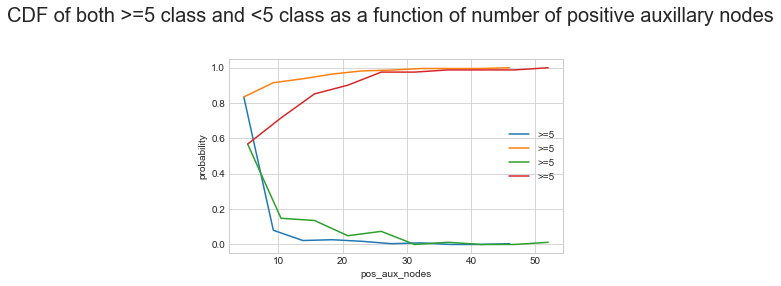

In [16]:
# plotting cdfs for pos_aux_nodes features
greater_5 = df.loc[df['survival_status']=='>=5']
less_5 = df.loc[df['survival_status']=='<5']
lst_1 = [greater_5,less_5]
count = 0
label_1 = ['>=5','<5']
def distribution(a):
    counts,bin_edges = np.histogram(a,bins = 10,density = True)
    pdf = counts/sum(counts)
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf,label = label_1[count])
    plt.plot(bin_edges[1:],cdf,label = label_1[count])
for i in lst_1:
    distribution(i['pos_aux_nodes'])
plt.subplots_adjust(top=0.8)
plt.suptitle('CDF of both >=5 class and <5 class as a function of number of positive auxillary nodes',size = 20)
plt.xlabel('pos_aux_nodes')
plt.ylabel('probability')
plt.legend()
plt.show()

## Observation
#### 1. The above pdf graphs are intersecting at approximately pos_aux_nodes = 7 and almost overlapping for pos_aux_nodes >30

#### 2. From cdf of class '<5' we can see that among people who live for less than 5 years after operation approximately 62% of them have number of positive auxillary nodes less than 7. 
#### 3. We will try to create an if-else model using this value of 7 as threshold.

In [17]:
#simple if-else model to separate the survival statuses based on number of positive auxillary nodes with threshold value = 7
lst = []
def model_1(pan):
    if pan<=7:
        return '>=5'
    else:
        return '<5'
for i in range(len(df)):
    d = df.iloc[i]
    k = model_1(d['pos_aux_nodes'])
    lst.append(k)
survival_status = df['survival_status']
survival_status_1 = list(survival_status)
count = 0
for i in range(len(survival_status_1)):
    if lst[i]!=survival_status_1[i]:
        count+=1
print(count)
accuracy = ((len(survival_status)-count)/len(survival_status))*100
print(accuracy)

77
74.75409836065575


## Observation
#### We can see that by creating a simple if-else model we are getting an accuracy of 74.75% in determining if a person will live for >=5 years or <5 years and the number of instances where our model fails is 77 times out of 305 available data-points. 

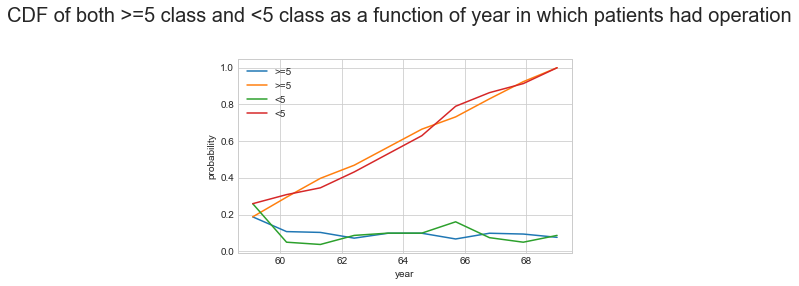

In [18]:
# plotting cdfs for 'year' features
greater_5 = df.loc[df['survival_status']=='>=5']
less_5 = df.loc[df['survival_status']=='<5']
lst_1 = [greater_5,less_5]
count=0
label_1 = ['>=5','<5']
def distribution(a):
    counts,bin_edges = np.histogram(a,bins = 10,density = True)
    pdf = counts/sum(counts)
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf,label = label_1[count])
    plt.plot(bin_edges[1:],cdf,label = label_1[count])
for i in lst_1:
    distribution(i['year'])
    count+=1
plt.subplots_adjust(top=0.8)
plt.suptitle('CDF of both >=5 class and <5 class as a function of year in which patients had operation',size = 20)
plt.xlabel('year')
plt.ylabel('probability')
plt.legend()
plt.show()

## Observation
#### We can see that both the cdf's and pdf's are almost overlapping and intersecting each other at multiple points thereby indicating that the feature 'year' is barely of any use.

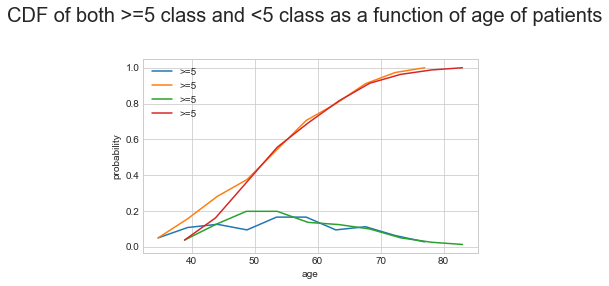

In [19]:
# plotting cdfs for 'age' features
greater_5 = df.loc[df['survival_status']=='>=5']
less_5 = df.loc[df['survival_status']=='<5']
lst_1 = [greater_5,less_5]
count = 0
label_1 = ['>=5','<5']
def distribution(a):
    counts,bin_edges = np.histogram(a,bins = 10,density = True)
    pdf = counts/sum(counts)
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf,label = label_1[count])
    plt.plot(bin_edges[1:],cdf,label = label_1[count])
for i in lst_1:
    distribution(i['age'])
plt.subplots_adjust(top=0.8)
plt.suptitle('CDF of both >=5 class and <5 class as a function of age of patients',size = 20)
plt.xlabel('age')
plt.ylabel('probability')
plt.legend()
plt.show()

## Observation
#### The pdf's and cdf's are worst than above case of 'year' feature as they are overlapping and hence providing us no ways by which we can differentiate the survival statuses.
#### Therefore only feature of any use is 'pos_aux_nodes'.

In [20]:
#Mean and Standard deviation
print('\nMean\n')
print(np.mean(greater_5['pos_aux_nodes']))
print(np.mean(less_5['pos_aux_nodes']))
print('\nStandard Deviation\n')
print(np.std(greater_5['pos_aux_nodes']))
print(np.std(less_5['pos_aux_nodes']))


Mean

2.799107142857143
7.45679012345679

Standard Deviation

5.869092706952767
9.128776076761632


## Plotting Box-Plots for each of the features

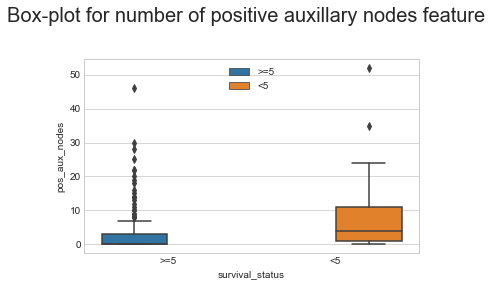

In [21]:
#Box-plot for pos_aux_nodes
ax = sns.boxplot(x = 'survival_status',y = 'pos_aux_nodes',hue = 'survival_status',data = df)
handles,_ = ax.get_legend_handles_labels()
ax.legend(handles,['>=5','<5'],loc = 9)
plt.subplots_adjust(top=0.8)
plt.suptitle('Box-plot for number of positive auxillary nodes feature',size = 20)
plt.show()

## Observation
#### 1. From the box plot for '>=5' class the 50th percentile value of 'pos_aux_nodes' is 0 which means that 50% of people who lived for greater than equal to 5 years after operation had 0 positive auxillary nodes.
#### 2. From the box plot for '>=5' class the 75th percentile value of 'pos_aux_nodes' is 3 which means that 75% of people who lived for greater than equal to 5 years after operation had less than equal to 3 positive auxillary nodes.
#### 3. From the box plot for '<5' class the 25th percentile value of 'pos_aux_nodes' is 1 which means that 25% of people who lived for less than 5 years after operation had less than one positive auxillary nodes.
#### 4. From the box plot for '<5' class the 50th percentile value of 'pos_aux_nodes' is 4 which means that 50% of people who lived for less than 5 years after operation had less than equal to 4 positive auxillary nodes.
#### 5. From the box plot for '<5' class the th75 percentile value of 'pos_aux_nodes' is 11 which means that 75% of people who lived for less than 5 years after operation had less than equal to 11 positive auxillary nodes.
#### 6. Here we can take threshold = 3 and create a simple if-else model to distinguish classes '>=5' from '<5'.

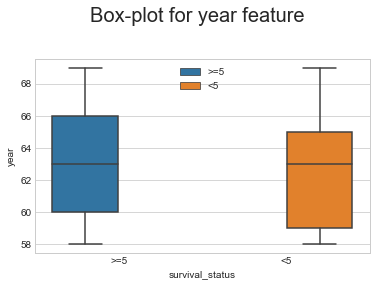

In [22]:
#Box-plot for year
ax = sns.boxplot(x = 'survival_status',y = 'year',hue = 'survival_status',data = df)
handles,_ = ax.get_legend_handles_labels()
ax.legend(handles,['>=5','<5'],loc = 9)
plt.subplots_adjust(top=0.8)
plt.suptitle('Box-plot for year feature',size = 20)
plt.show()

## Observation
#### 1. From the box plot for '>=5' class the 25th percentile value of 'year' is 1960 which means that 25% of people who lived for grater than equal to 5 years after operation had undergone operation on or before 1960.
#### 2. From the box plot for '>=5' class the 50th percentile value of 'year' is 1963 which means that 50% of people who lived for greater than equal to 5 years after operation had undergone operation on or before 1963.
#### 3. From the box plot for '>=5' class the 75th percentile value of 'year' is 1966 which means that 75% of people who lived for greater than equal to 5 years after operation had undergone operation on or before 1966.
#### 4. From the box plot for '<5' class the 25th percentile value of 'year' is 1959 which means that 25% of people who lived for less than 5 years after operation had undergone operation on or before 1959.
#### 5. From the box plot for '<5' class the 50th percentile value of 'year' is 1963 which means that 50% of people who lived for less than 5 years after operation had undergone operation on or before 1963.
#### 6. From the box plot for '<5' class the th75 percentile value of 'year' is 1965 which means that 75% of people who lived for less than 5 years after operation had undergone operation on or before 1965.
#### 7. From the above 6 points we can see most of the values like 25%ile, 50%ile and 75%ile values of both the classes are overlapping which indicates that both the box-plots are providing the same information which means that these box-plots are not providing us any information which can distinguish one class from another (i.e. '>=5' class from '<5') and thus we will not be able to create any if-else model using 'year' feature.¶

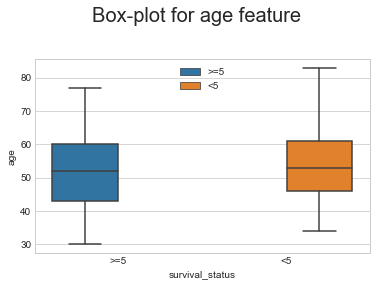

In [23]:
#Box-plot for age
ax = sns.boxplot(x = 'survival_status',y = 'age',hue = 'survival_status',data = df)
handles,_ = ax.get_legend_handles_labels()
ax.legend(handles,['>=5','<5'],loc = 9)
plt.subplots_adjust(top=0.8)
plt.suptitle('Box-plot for age feature',size = 20)
plt.show()

## Observation
#### Like in 'year' feature, here also we can see that the 25%ile, 50%ile and 75%ile are almost overlapping which indicates that both the box-plots are providing the same information which means that these box-plots are not providing us any information which can distinguish one class from another (i.e. '>=5' class from '<5') and thus we will not be able to create any if-else model using 'age' feature.

#### 1. From all the above plots we get to know that 'pos_aux_nodes' is most effective feature in determining if a patient will survive '>=5' years or '<5' years.
#### 2. Now we will compute Mean, Standard Deviation, Median, Percentiles and Median Absolute Deviation for most effective feature i.e. 'pos_aux_nodes'.

## Calculating Measures of Central Tendency and Measures of Dispersion for the most effective feature.

In [24]:
#Mean and Standard deviation
print('\nMean\n')
print(np.mean(greater_5['pos_aux_nodes']))
print(np.mean(less_5['pos_aux_nodes']))
print('\nStandard Deviation\n')
print(np.std(greater_5['pos_aux_nodes']))
print(np.std(less_5['pos_aux_nodes']))
#Median, Quantiles, Percentiles
print('\nMedian\n')
print(np.median(greater_5['pos_aux_nodes']))
print(np.median(less_5['pos_aux_nodes']))
print('\nQuantiles\n')
print(np.percentile(greater_5['pos_aux_nodes'],np.arange(0,125,25)))
print(np.percentile(less_5['pos_aux_nodes'],np.arange(0,125,25)))
print('\n90th percentile\n')
print(np.percentile(greater_5['pos_aux_nodes'],90))
print(np.percentile(less_5['pos_aux_nodes'],90))
print('\nMedian Absolute deviation\n')
print(robust.mad(greater_5['pos_aux_nodes']))
print(robust.mad(less_5['pos_aux_nodes']))


Mean

2.799107142857143
7.45679012345679

Standard Deviation

5.869092706952767
9.128776076761632

Median

0.0
4.0

Quantiles

[ 0.  0.  0.  3. 46.]
[ 0.  1.  4. 11. 52.]

90th percentile

8.0
20.0

Median Absolute deviation

0.0
5.930408874022408


<ul><h1>Conclusion</h1><p>From the above exploratory data analysis that we did on Haberman Cancer Survival dataset we found many interesting things. We found that among the three features provided to us (age of patient, year of operation and number of positive auxillary nodes) the feature which was most useful in determining wether a patient would live for greater than equal to 5 years or not is the 'number of positive auxillary nodes' and this makes a lot of sense because age of patient and year of operation will have minimal effect on the survival status of the patient after operation unless the patient is not too old. We also saw that the Probability density functions and box plots for 'age' and 'year' features were almost overlapping for survival statuses of greater than equal to 5 and less than equal to 5 years and hence did not provide us any unique information which could help us build a simple if-else model to predict the survival statuses of a patient and hence help us in classifying the two class labels. We did build two simple if-else models for predicting the survival statuses of patient using threshold values of 3 and 7 respectively, but the level of accuracy which we got was not acceptable as getting an accuracy of 70%-75% is really low especially when we are predicting whether a patient has cancer or not as one wrong prediction can make a patient go through lot of trauma. The low -accuracy limitations of these simple if-else models can be avoided by using complex Machine Learning models.</p></ul>